In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from mpl_toolkits.basemap import Basemap

import shapely.geometry
import shapely.ops

import pandas as pd

from scipy import spatial
from scipy import interpolate

States seen on flight from EWR to LAX: ['Arizona' 'California' 'Colorado' 'Connecticut' 'Illinois' 'Indiana'
 'Iowa' 'Kansas' 'Missouri' 'Nebraska' 'Nevada' 'New Jersey' 'New Mexico'
 'New York' 'Ohio' 'Pennsylvania' 'Utah' 'West Virginia']


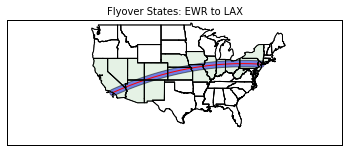

In [81]:
#1
m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
        urcrnrlon=-50.,urcrnrlat=50.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc',
        lat_0=40.,lon_0=-100.,lat_ts=20.)
m.readshapefile('../python4geosciences/materials/states_21basic/states', 'states')

states_seen = []
state_list = []
state_names = []
for state in m.states:
    state_list.append(shapely.geometry.Polygon(state))
    
x, y = m.gcpoints(-118.4081, 33.9425, -74.1686, 40.6925, 1000)
m.plot(x, y, 'r')
path = shapely.geometry.LineString(zip(x, y))
path = path.buffer(100000)

plt.title('Flyover States: EWR to LAX', fontsize = 10)
plt.fill(path.boundary.xy[0], path.boundary.xy[1], 'b', lw = 1, alpha = 0.5)
for num, p in enumerate(state_list):
    if p.intersection(line):
        color = 'g'
        states_seen.append(p)
        state_names.append(m.states_info[num]['STATE_NAME'])
    else:
        color = 'w'
    plt.plot(*p.boundary.xy, color = 'k')
    plt.fill(*p.boundary.xy, color = color, alpha = 0.1)
    
print('States seen on flight from EWR to LAX:', np.unique(state_names))

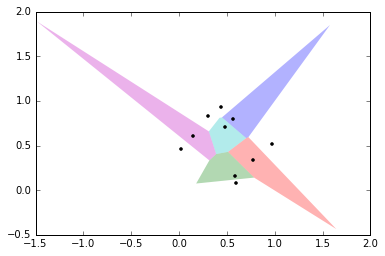

In [59]:
#2a
pts = np.array([[ 0.77354201,  0.34072038],
           [ 0.43807549,  0.93001924],
           [ 0.5624092 ,  0.79438991],
           [ 0.02536295,  0.46180244],
           [ 0.59533179,  0.07522803],
           [ 0.47867418,  0.70302822],
           [ 0.30371564,  0.83135442],
           [ 0.5856915 ,  0.16340903],
           [ 0.14700491,  0.60268997],
           [ 0.97098631,  0.51692456]])

vor = spatial.Voronoi(pts)

for indices in vor.regions:
    if not indices: continue     
    if -1 in indices: continue   
    plt.fill(vor.vertices[indices, 0], vor.vertices[indices, 1], edgecolor='none', alpha=0.3)

plt.plot(pts[:, 0], pts[:, 1], '.k')

In [98]:
#2b
lines = [shapely.geometry.LineString(vor.vertices[line]) for line in vor.ridge_vertices if -1 not in line]

region = []
regions = []

total_area = 0
fraction1 = 0
fraction2 = 0
fraction3 = 0

for region in shapely.ops.polygonize(lines):
    regions.append(region)
    total_area = region.area
    fraction1+=region.buffer(-0.1).area
    fraction2+=region.buffer(-0.01).area
    fraction3+=region.buffer(-0.001).area
    
print('Total Area:', total_area)  
print('Area 0.1 Unit Away:', fraction1)
print('Area 0.01 Unit Away:', fraction2)
print('Area 0.001 Unit Away:', fraction3)

Total Area: 0.11884011200879535
Area 0.1 Unit Away: 0.09372659526518255
Area 0.01 Unit Away: 0.8772730448315536
Area 0.001 Unit Away: 0.9997882598652638


(35, 0)

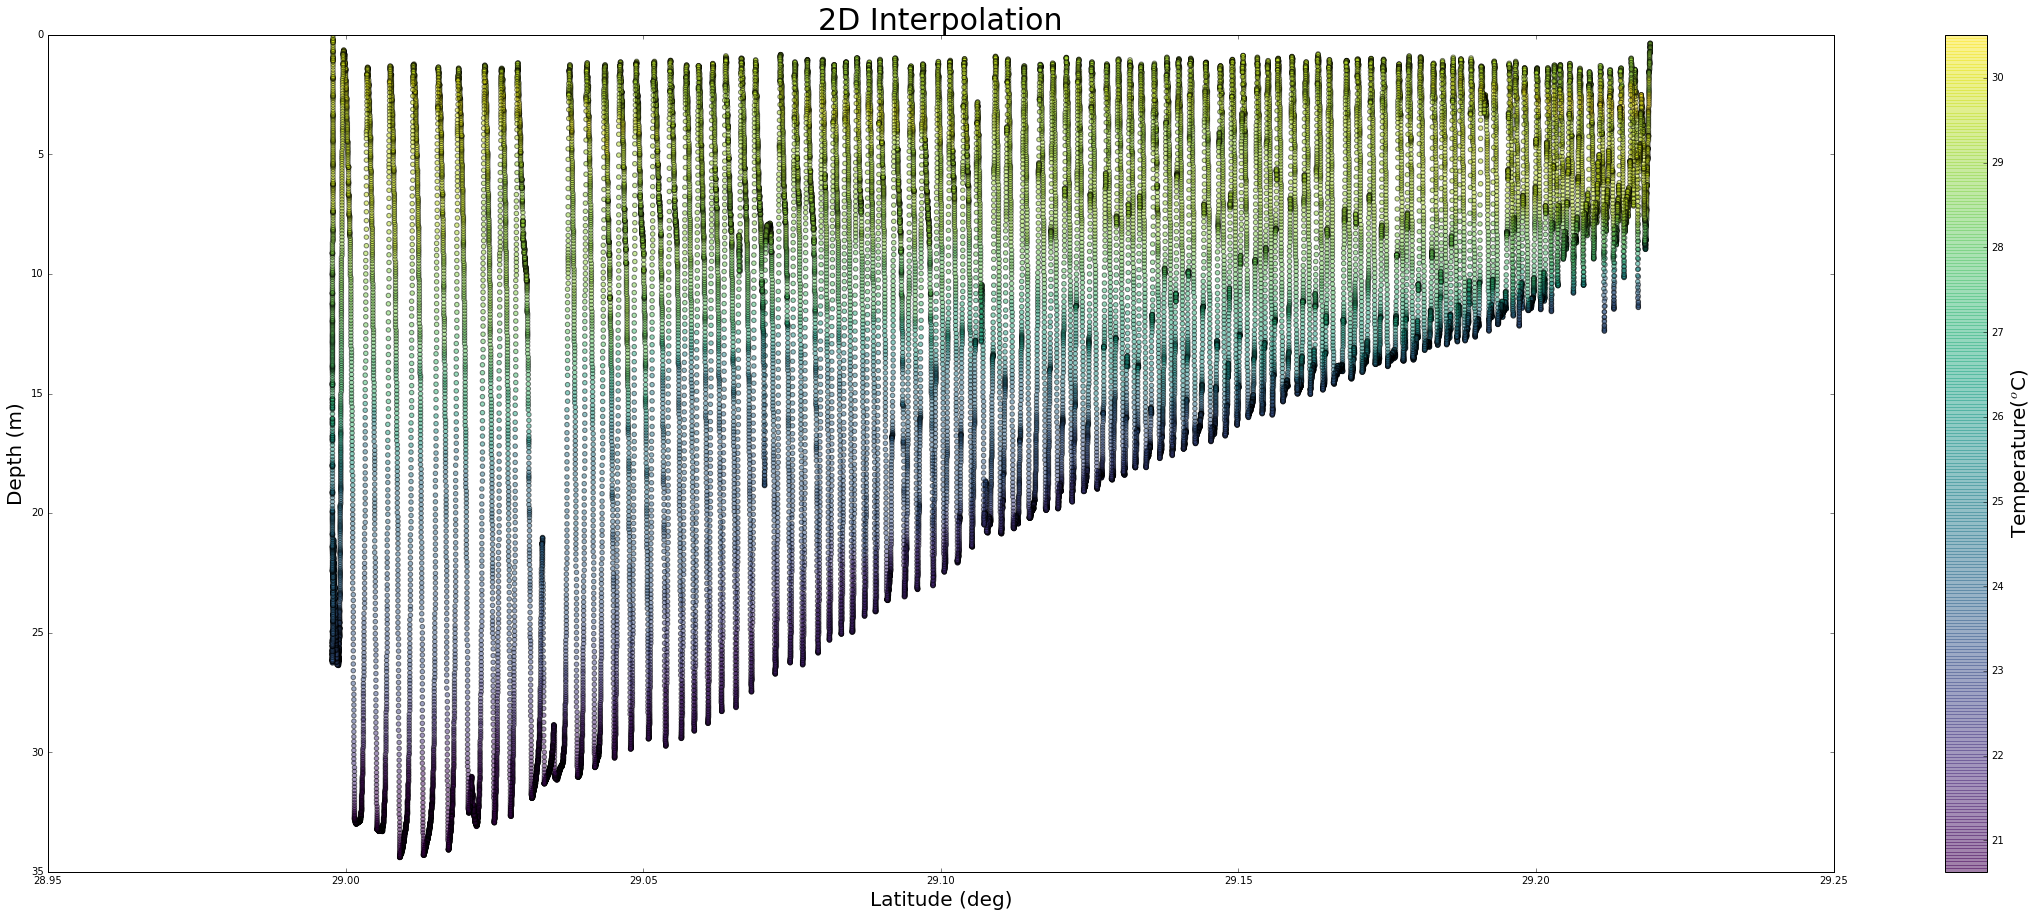

In [92]:
#3
fig = plt.figure(figsize = (40, 15))
ax = fig.add_subplot(111)

txtdata = pd.read_table('../python4geosciences/data/MS03_L15.txt', skiprows = range(114), delim_whitespace=True, 
                     usecols = [0,2,3], names = ['Latitude','Depth','Temperature'])
latitude = txtdata['Latitude']
depth = txtdata['Depth']
temperature = txtdata['Temperature']

gradient = ax.scatter(latitude, depth, c = temperature, cmap = 'viridis', alpha = 0.5)
fig.colorbar(gradient).set_label('Temperature($^{o}$C)', fontsize = 20)

ax.set_title('2D Interpolation', fontsize = 30)
ax.set_xlabel('Latitude (deg)', fontsize = 20)
ax.set_ylabel('Depth (m)', fontsize = 20)
ax.set_ylim(35,0)